In [121]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

import numpy as np, scipy.stats as st
import statsmodels.stats.api as sms



In [122]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-mahatyrov/statistics/london.csv')

Узнать есть ли пропущенные значения

In [123]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

по оси x – дата (timestamp)
по оси y – число поездок (cnt)

In [124]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

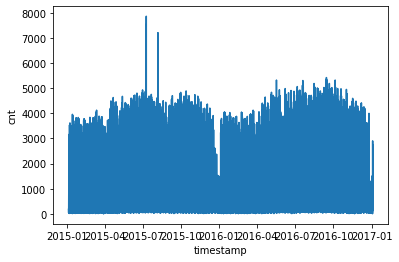

In [125]:
sns.lineplot(x=df.timestamp, y=df.cnt)

Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут. Например, посчитать сумму показателя по дням, имея данные по часам, можно следующим образом:

data.resample(rule='D').column_name.sum() #способ 1

data.resample(rule='D').agg({'column_name':'sum'}) #способ 2, эквивалентный предыдущему


Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

In [126]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [182]:
df.timestamp = df.timestamp.sort_values()

In [183]:
df_2 = df.set_index(df.timestamp)

In [184]:
df_2

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [185]:
df_2 = pd.DataFrame(df_2.resample(rule='D').cnt.sum())#способ 1

In [186]:
df_2 = df_2.reset_index()


In [187]:
df_2

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
726,2016-12-30,11566
727,2016-12-31,11424
728,2017-01-01,6421
729,2017-01-02,11823


Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. Например:

c = a - b
std = np.std(c)


В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

In [188]:
df_2_std = np.std(df_2.cnt - df_2.rolling(window=3).mean().cnt).round(2)


In [189]:
df_2_std

4558.59

In [190]:
df_2.cnt = df_2.rolling(window=3).mean().cnt


In [191]:
df_2

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667
...,...,...
726,2016-12-30,12682.000000
727,2016-12-31,12347.333333
728,2017-01-01,9803.666667
729,2017-01-02,9889.333333


Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std

lower_bound – нижняя граница; вычитаем 2.576∗std

Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

Note: в качестве std нужно брать стандартное отклонение без округления.

Note 2: вам может понадобиться убрать даты из индекса - иногда из-за этого колонки могут не присваиваться в датафрейм. Вам пригодится .reset_index().

In [192]:
df_2['upper_bound'] = df_2.cnt + 2.576*df_2_std
df_2['lower_bound'] = df_2.cnt - 2.576*df_2_std


In [194]:
df_2.tail()

,timestamp,cnt,upper_bound,lower_bound
726,2016-12-30,12682.000000,24424.927840,939.072160
727,2016-12-31,12347.333333,24090.261173,604.405493
728,2017-01-01,9803.666667,21546.594507,-1939.261173
729,2017-01-02,9889.333333,21632.261173,-1853.594507
730,2017-01-03,12560.000000,24302.927840,817.072160


И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [195]:
df_2.query('cnt > upper_bound')

,timestamp,cnt,upper_bound,lower_bound


In [181]:
df_2.query('cnt > upper_bound')

,timestamp,cnt,upper_bound,lower_bound


In [216]:
df_res['lower_bound'] = df_2.lower_bound

In [206]:
df_res.query('cnt > upper_bound')

,timestamp,cnt,upper_bound
186,2015-07-09,72504,62447.927840
214,2015-08-06,63468,58370.261173
609,2016-09-04,27512,26001.927840
721,2016-12-25,36653,31393.594507


In [217]:
df_res.query('cnt < lower_bound')

,timestamp,cnt,upper_bound,lower_bound
130,2015-05-14,15609,40452.261173,16966.405493
189,2015-07-12,23240,47779.594507,24293.738827
201,2015-07-24,16034,42756.594507,19270.738827
232,2015-08-24,17400,41272.261173,17786.405493
314,2015-11-14,8898,32780.261173,9294.405493
607,2016-09-02,0,37829.261173,14343.405493
615,2016-09-10,17080,43004.927840,19519.072160
621,2016-09-16,21967,47936.261173,24450.405493
678,2016-11-12,8990,32620.927840,9135.072160


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [219]:
df.query('timestamp == "2016-12-25"')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17174,2016-12-25,207,11.0,11.0,77.0,35.0,3.0,0.0,1.0,3.0


In [207]:
df_res.query('timestamp ==  "2016-09-02"')

,timestamp,cnt,upper_bound
607,2016-09-02,0,37829.261173


In [213]:
df.query('timestamp == "2016-12-25"')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17174,2016-12-25,207,11.0,11.0,77.0,35.0,3.0,0.0,1.0,3.0


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

In [3]:
mu = 100
sigma = 10

In [4]:
population = np.round(np.random.normal(mu, sigma, 10000), 2)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


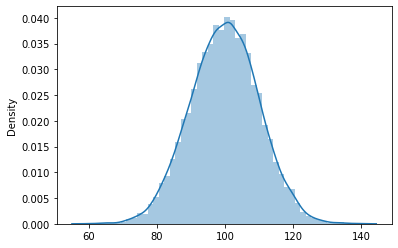

In [5]:
sns.distplot(population)

In [6]:
population.mean()

99.912192

In [7]:
population.std()

9.982547648528204

In [8]:
sample_size = 30

In [9]:
sample = np.random.choice(population, sample_size, False)

In [10]:
sample.mean()

100.46799999999998

In [11]:
se = sample.std() / sample_size** 0.5

In [12]:
conf_int = [sample.mean() - se*3, sample.mean() + se*3 ]
conf_int

[93.74894197078189, 107.18705802921806]

In [13]:
sample_means = []

In [14]:
n = 10000

In [15]:
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_means.append(sample.mean())

In [16]:
np.mean(sample_means)

99.91822680000001

In [17]:
x=10
sd=5
n=100



In [18]:
population = np.random.normal(x, sd, 100)

In [21]:
se = sd / n ** 0.5

In [23]:
10+2.58*0.5

11.29

In [27]:
n=64
sd=4
X =18.5

In [28]:
se = sd / n ** 0.5

In [29]:
X + se* 1.96

19.48

In [7]:
X - se* 1.96 

16.677237024496915

In [4]:
n=64
sd=4, 
X =18.5

In [13]:
population = np.round(np.random.normal(X, sd, 64), 2)

In [24]:
se = 4 / (64 ** 0.5)
se

0.5

In [25]:
1.96 * se + 18.5

19.48

In [22]:
st.sem(population)

0.4730395885816021

In [14]:
import numpy as np, scipy.stats as st
import statsmodels.stats.api as sms

a = range(95)

# первый способ


# второй способ
sms.DescrStatsW(population).tconfint_mean()

(17.607674562274145, 19.49826293772586)

In [15]:
st.t.interval(0.95, len(population)-1, loc=np.mean(population), scale=st.sem(population))

(17.60767456227414, 19.498262937725855)

В среднем слушатели курса по введению в статистику набирают 115 баллов, однако, в 2015 году средний балл случайно выбранных 144 участников составил 118 со стандартным отклонением равным 9. Рассчитайте p-уровень значимости для проверки нулевой гипотезы о том, что среднее значение баллов в 2015 году равняется 115.

In [31]:
n = 144
x = 118
sd = 9

In [32]:
se = sd / n ** 0.5

In [34]:
(115 - x) / se

-4.0

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
mu = 100
sigma = 10

In [3]:
population = np.random.normal(mu, sigma, 10000).round(2)

In [4]:
mu = population.mean()

In [38]:
sigma = population.std()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


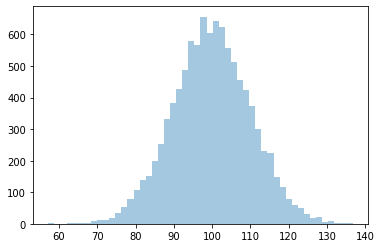

In [61]:
sns.distplot(population, kde=False)

In [58]:
sample_size = 30

In [9]:
sample_means = []

In [56]:
n = 3000

In [29]:
#создали выборку из ГС. Взяли 1000 выборок
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_means.append(sample.mean())

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


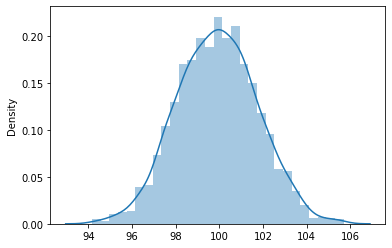

In [30]:
sns.distplot(sample_means, kde=True)

In [70]:
z_scores =  []

In [71]:
#z score считаем
n = 10000
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    z_score = (mu - sample_mean) / sigma
    z_scores.append(z_score)

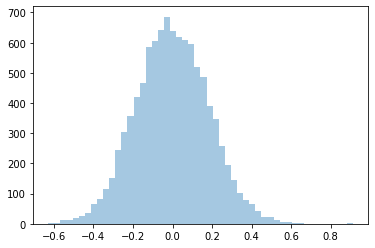

In [72]:
sns.distplot(z_scores, kde=False)

In [43]:
t_scores = []

In [59]:
#t score считаем
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    sample_std = sample.std()
    
    se_ = sample_std / sample_size ** 0.5
    
    t_score = (sample_mean - mu) / se_
    t_scores.append(t_score)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


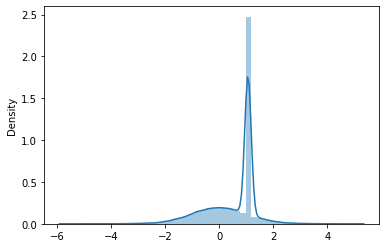

In [60]:
sns.distplot(t_scores, kde=True)